In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv("C:/Users/NANDAN/Documents/Excelr Assignments/Cardiotocographic.csv")
display(df.head())

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [7]:
display(df.describe())

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2105.000000,2106.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,133.343598,0.003219,0.009894,0.004391,0.001895,0.000003,0.000175,46.995984,1.364378,10.285964,8.284887,70.429260,0.316371,1.304507
std,11.270154,0.004391,0.067540,0.003340,0.003343,0.000142,0.000840,18.813973,1.173632,21.205041,7.772858,42.931822,0.645622,0.644619
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001634,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.000000
75%,140.000000,0.005650,0.002567,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.900000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


In [8]:
print(df.isnull().sum())

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64


The previous step identified columns with missing values. 
Now, I need to determine the most appropriate imputation strategy for these numerical columns. Given that the percentage of missing values is very small (~1.5%) and to ensure robustness against potential outliers, 
I will impute the missing values with the median of each respective column.

In [9]:
for column in ['LB', 'AC', 'DS', 'DP', 'MLTV', 'Width', 'Tendency', 'NSP']:
    median_value = df[column].median()
    df[column].fillna(median_value, inplace=True)

print("Missing values after imputation:")
print(df.isnull().sum())

Missing values after imputation:
LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64


Reasoning: The previous code block produced a FutureWarning due to chained assignment with inplace=True.
Although the imputation was successful, 
I will modify the code to directly assign the result of fillna back to the DataFrame column, 
which is the recommended practice to avoid warnings and ensure correct behavior in future pandas versions

In [10]:
for column in ['LB', 'AC', 'DS', 'DP', 'MLTV', 'Width', 'Tendency', 'NSP']:
    median_value = df[column].median()
    df[column] = df[column].fillna(median_value)

print("Missing values after imputation:")
print(df.isnull().sum())

Missing values after imputation:
LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   float64
 1   AC        2126 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2126 non-null   float64
 6   DP        2126 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2126 non-null   float64
 11  Width     2126 non-null   float64
 12  Tendency  2126 non-null   float64
 13  NSP       2126 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [12]:
print(f"Unique values in 'NSP': {df['NSP'].nunique()}")
print(f"Unique values in 'Tendency': {df['Tendency'].nunique()}")

Unique values in 'NSP': 111
Unique values in 'Tendency': 111


In [13]:
df['NSP'] = df['NSP'].astype('category')
df['Tendency'] = df['Tendency'].astype('category')

print("Data types after conversion:")
print(df[['NSP', 'Tendency']].dtypes)

Data types after conversion:
NSP         category
Tendency    category
dtype: object


In [14]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

print(f"Numerical columns for plotting: {numerical_cols}")

Numerical columns for plotting: ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width']


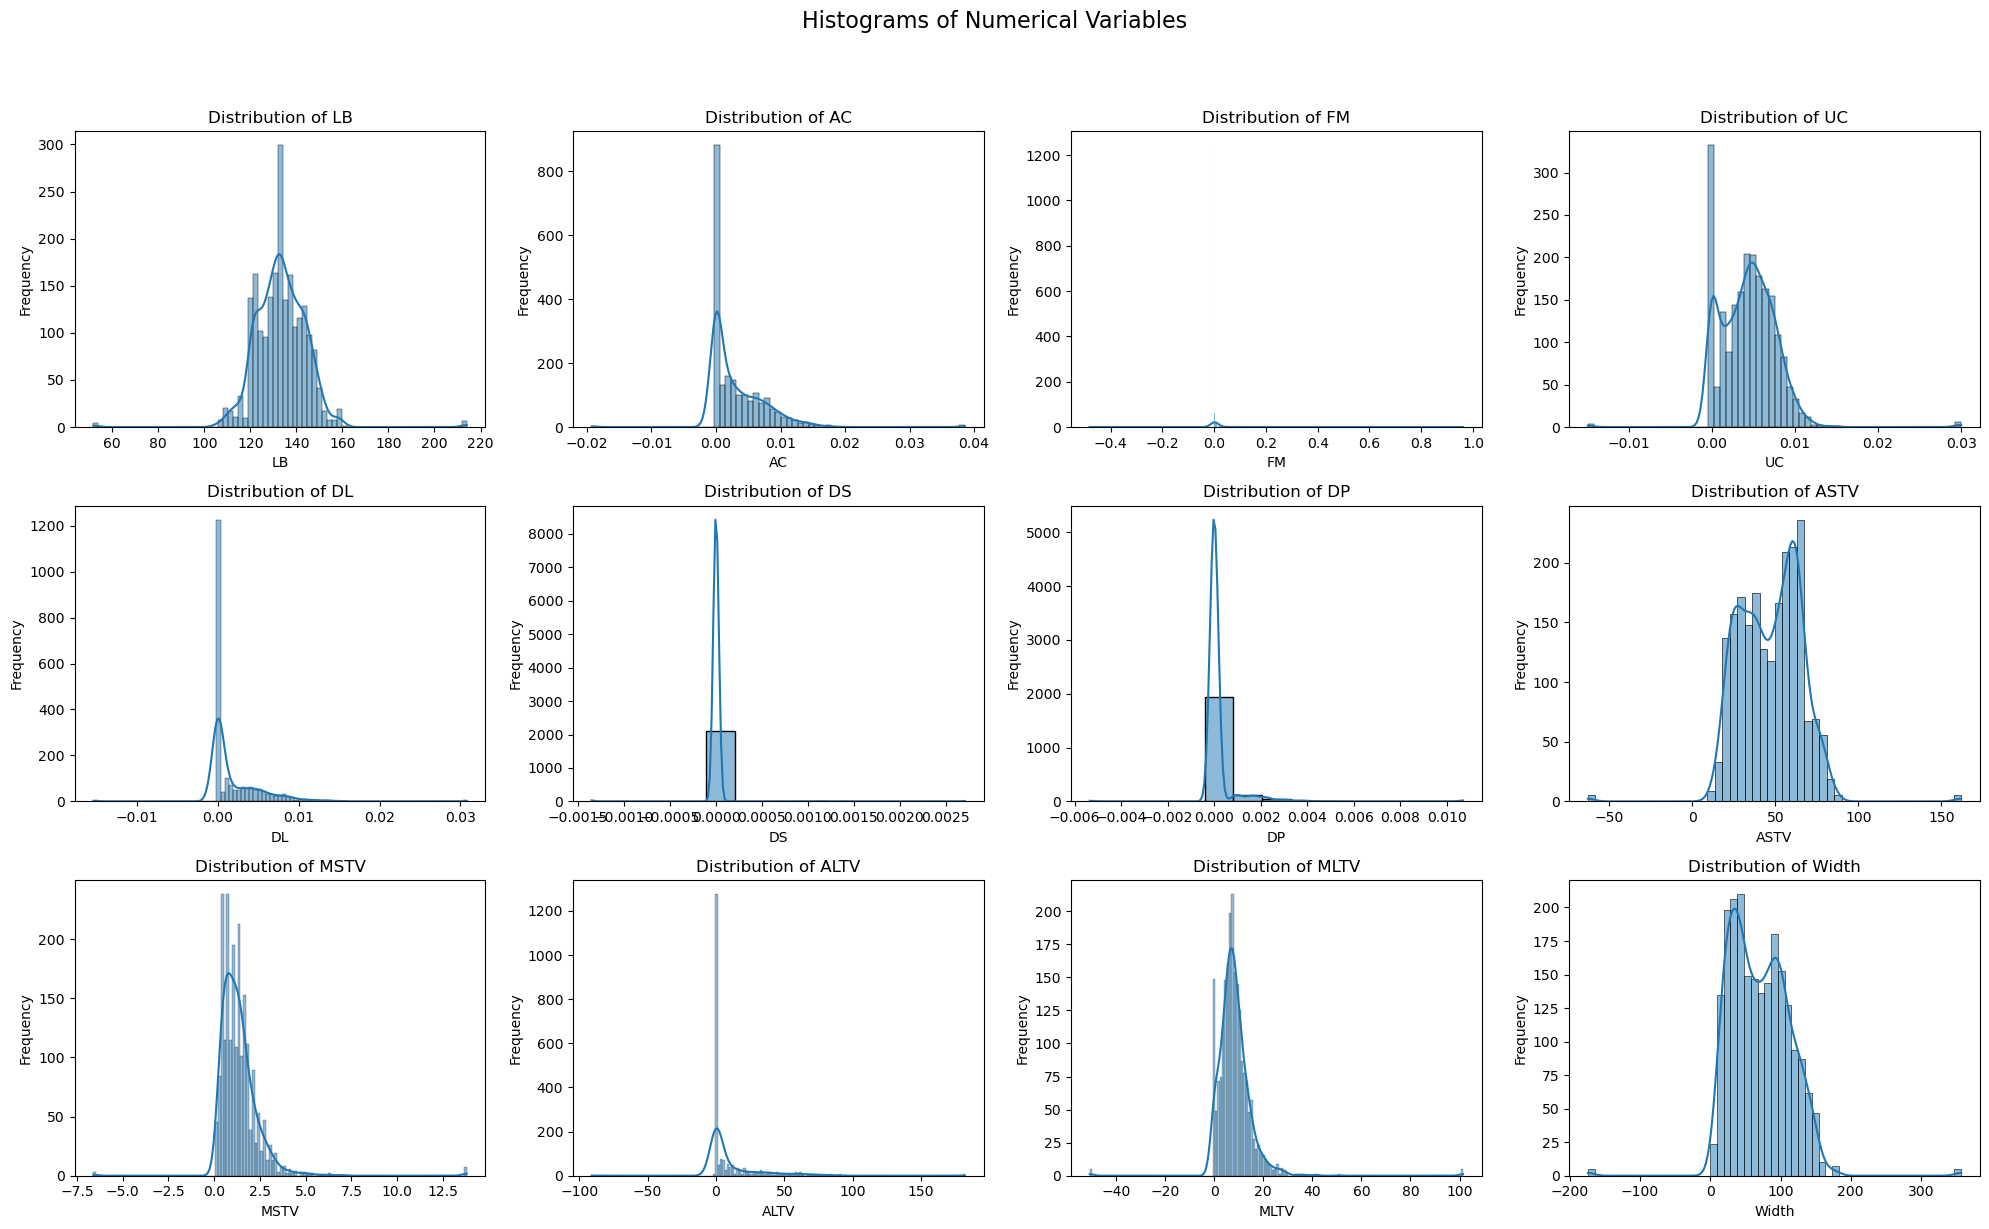

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

n_cols = 4
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 5, n_rows * 4))
plt.suptitle('Histograms of Numerical Variables', y=1.02, fontsize=16)

for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

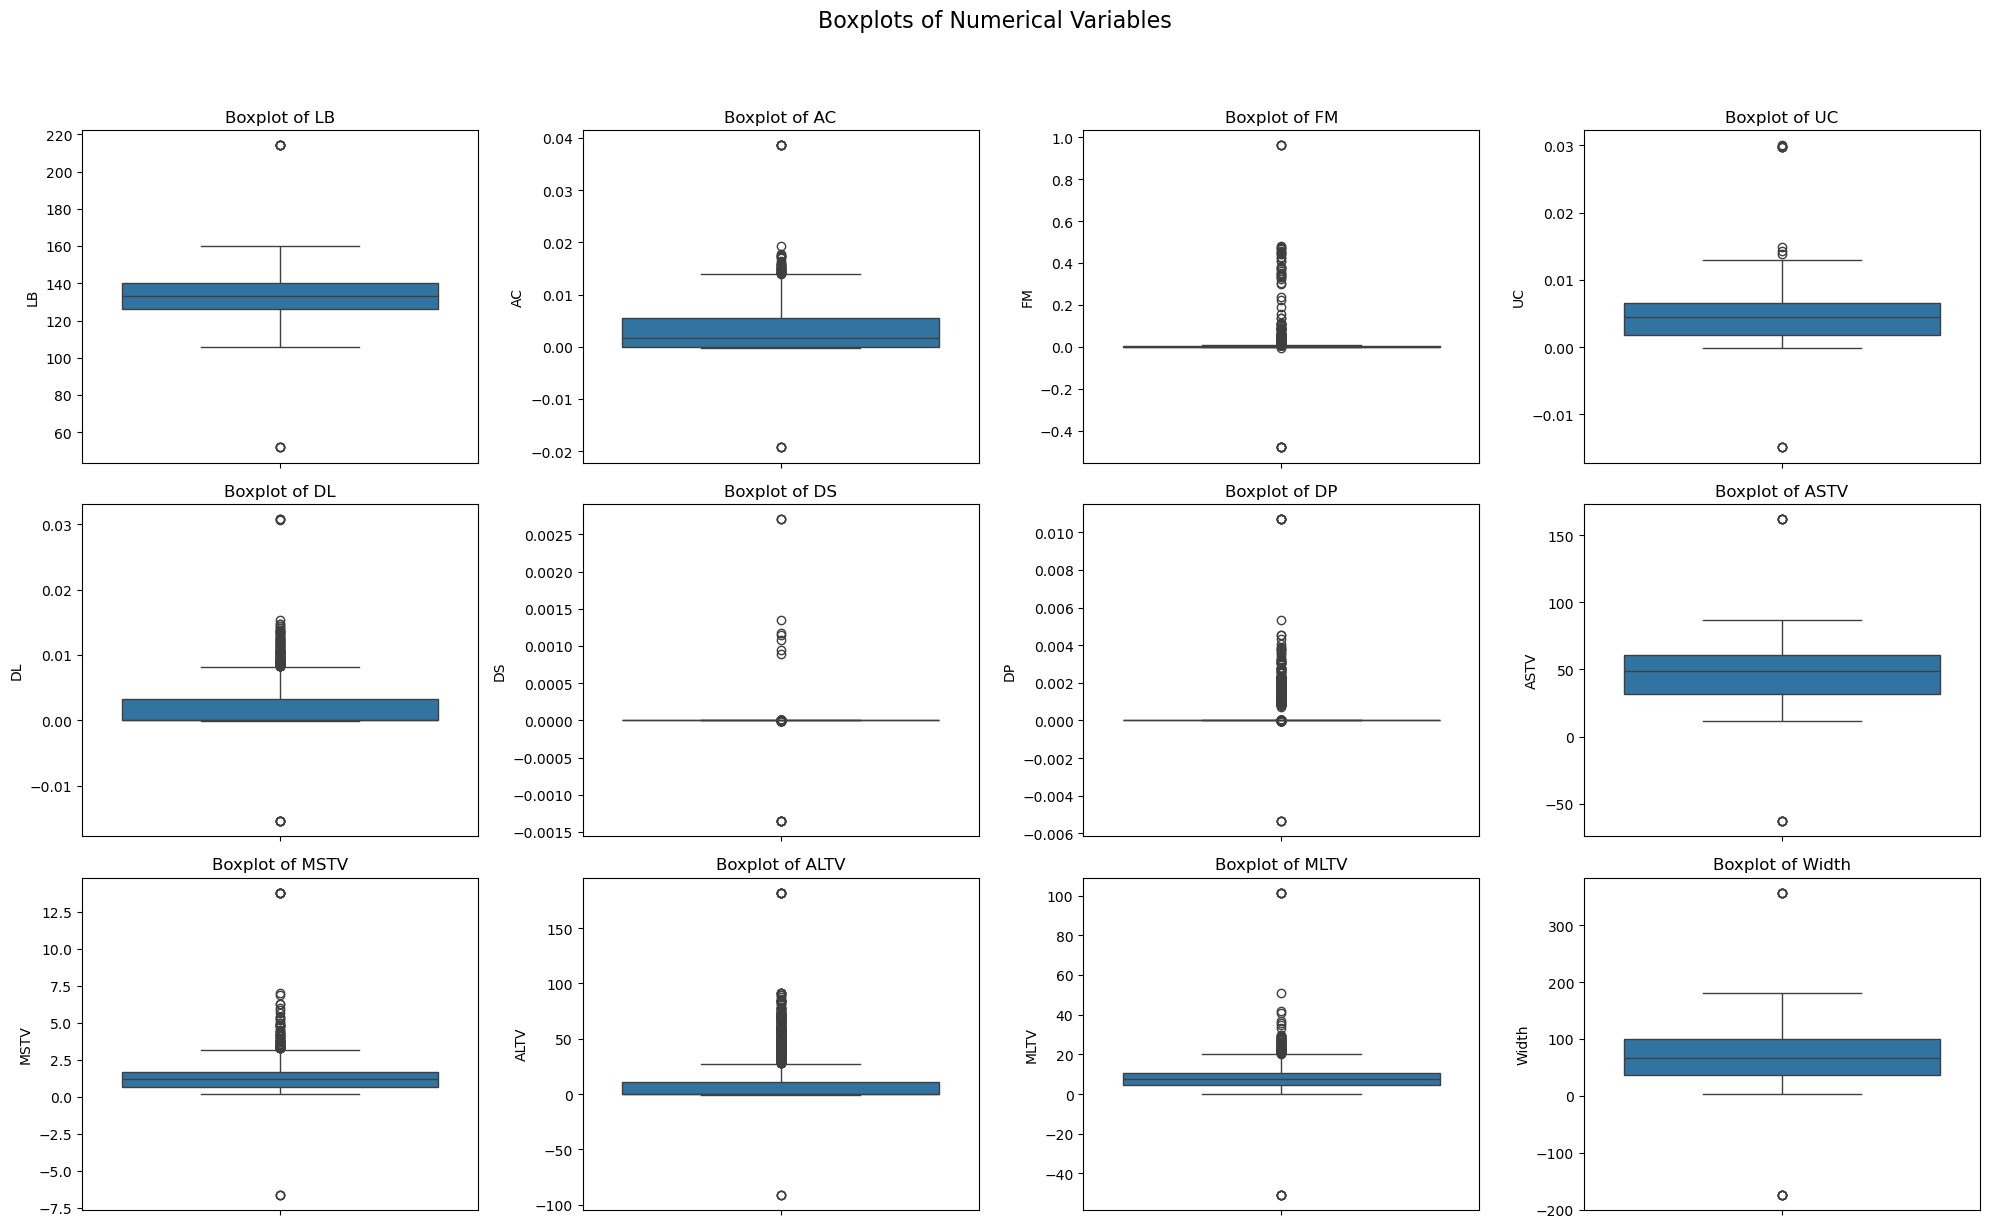

In [16]:
plt.figure(figsize=(n_cols * 5, n_rows * 4))
plt.suptitle('Boxplots of Numerical Variables', y=1.02, fontsize=16)

for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

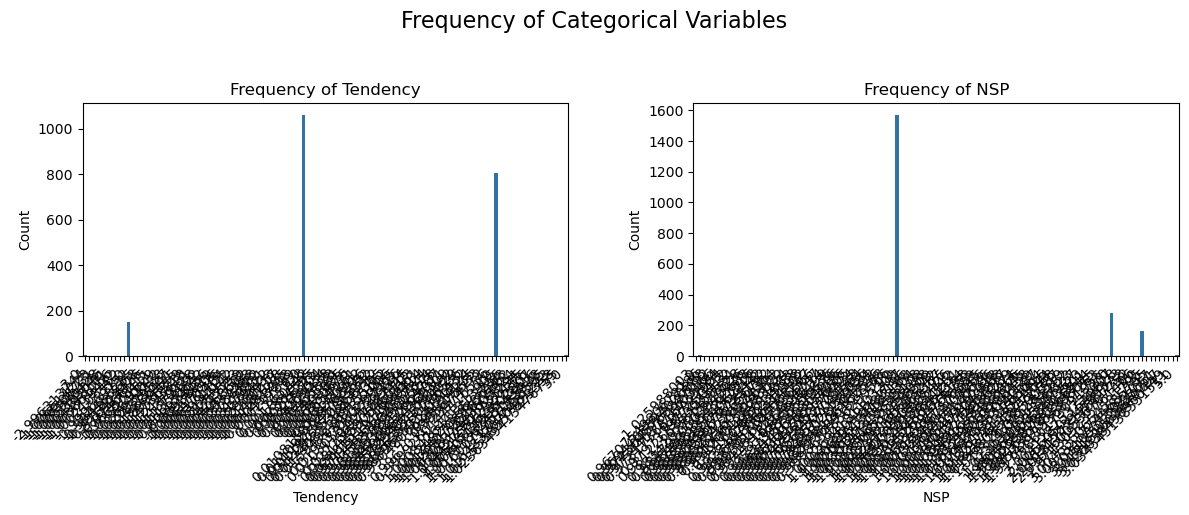

In [17]:
categorical_cols = df.select_dtypes(include='category').columns.tolist()

# Determine grid size for bar charts
n_cols = 2
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 6, n_rows * 5))
plt.suptitle('Frequency of Categorical Variables', y=1.02, fontsize=16)

for i, col in enumerate(categorical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(x=df[col])
    plt.title(f'Frequency of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability if categories are long

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

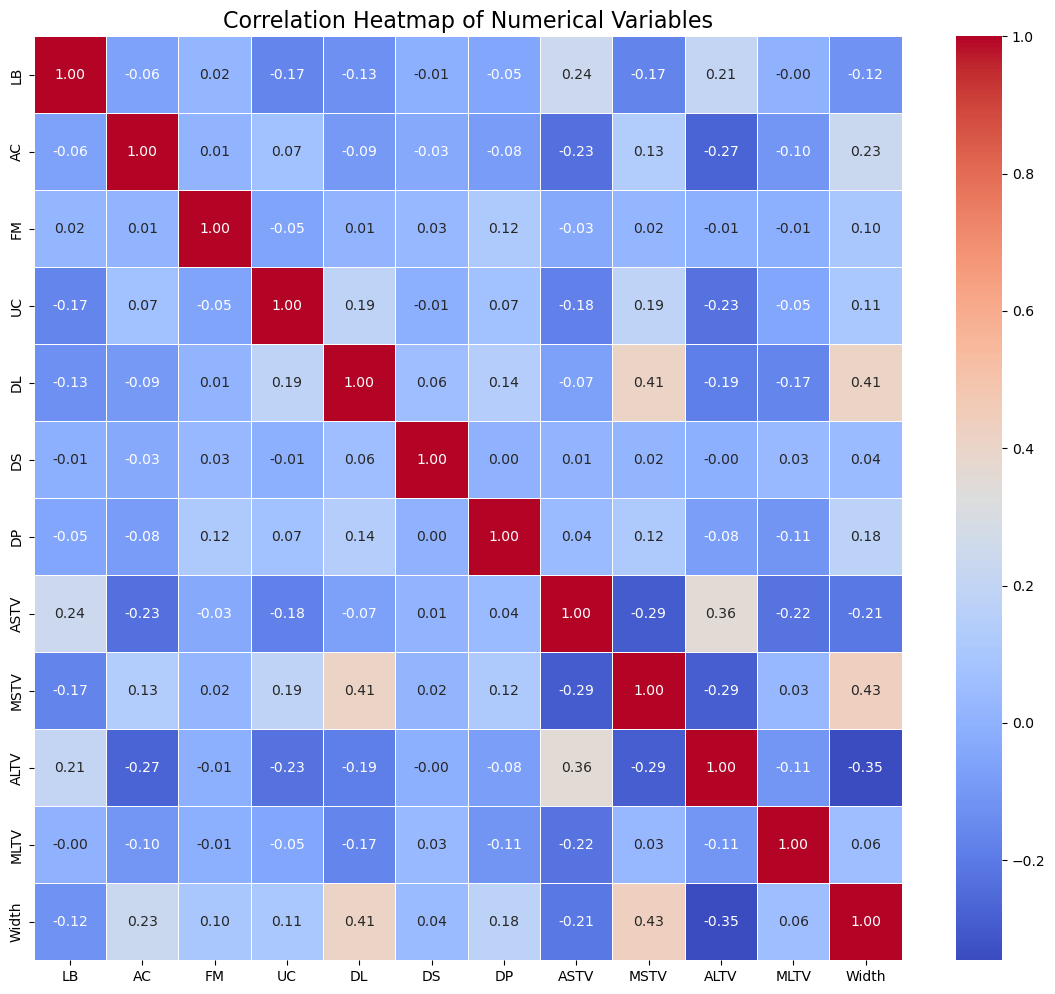

In [18]:
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of Numerical Variables', fontsize=16)
plt.show()

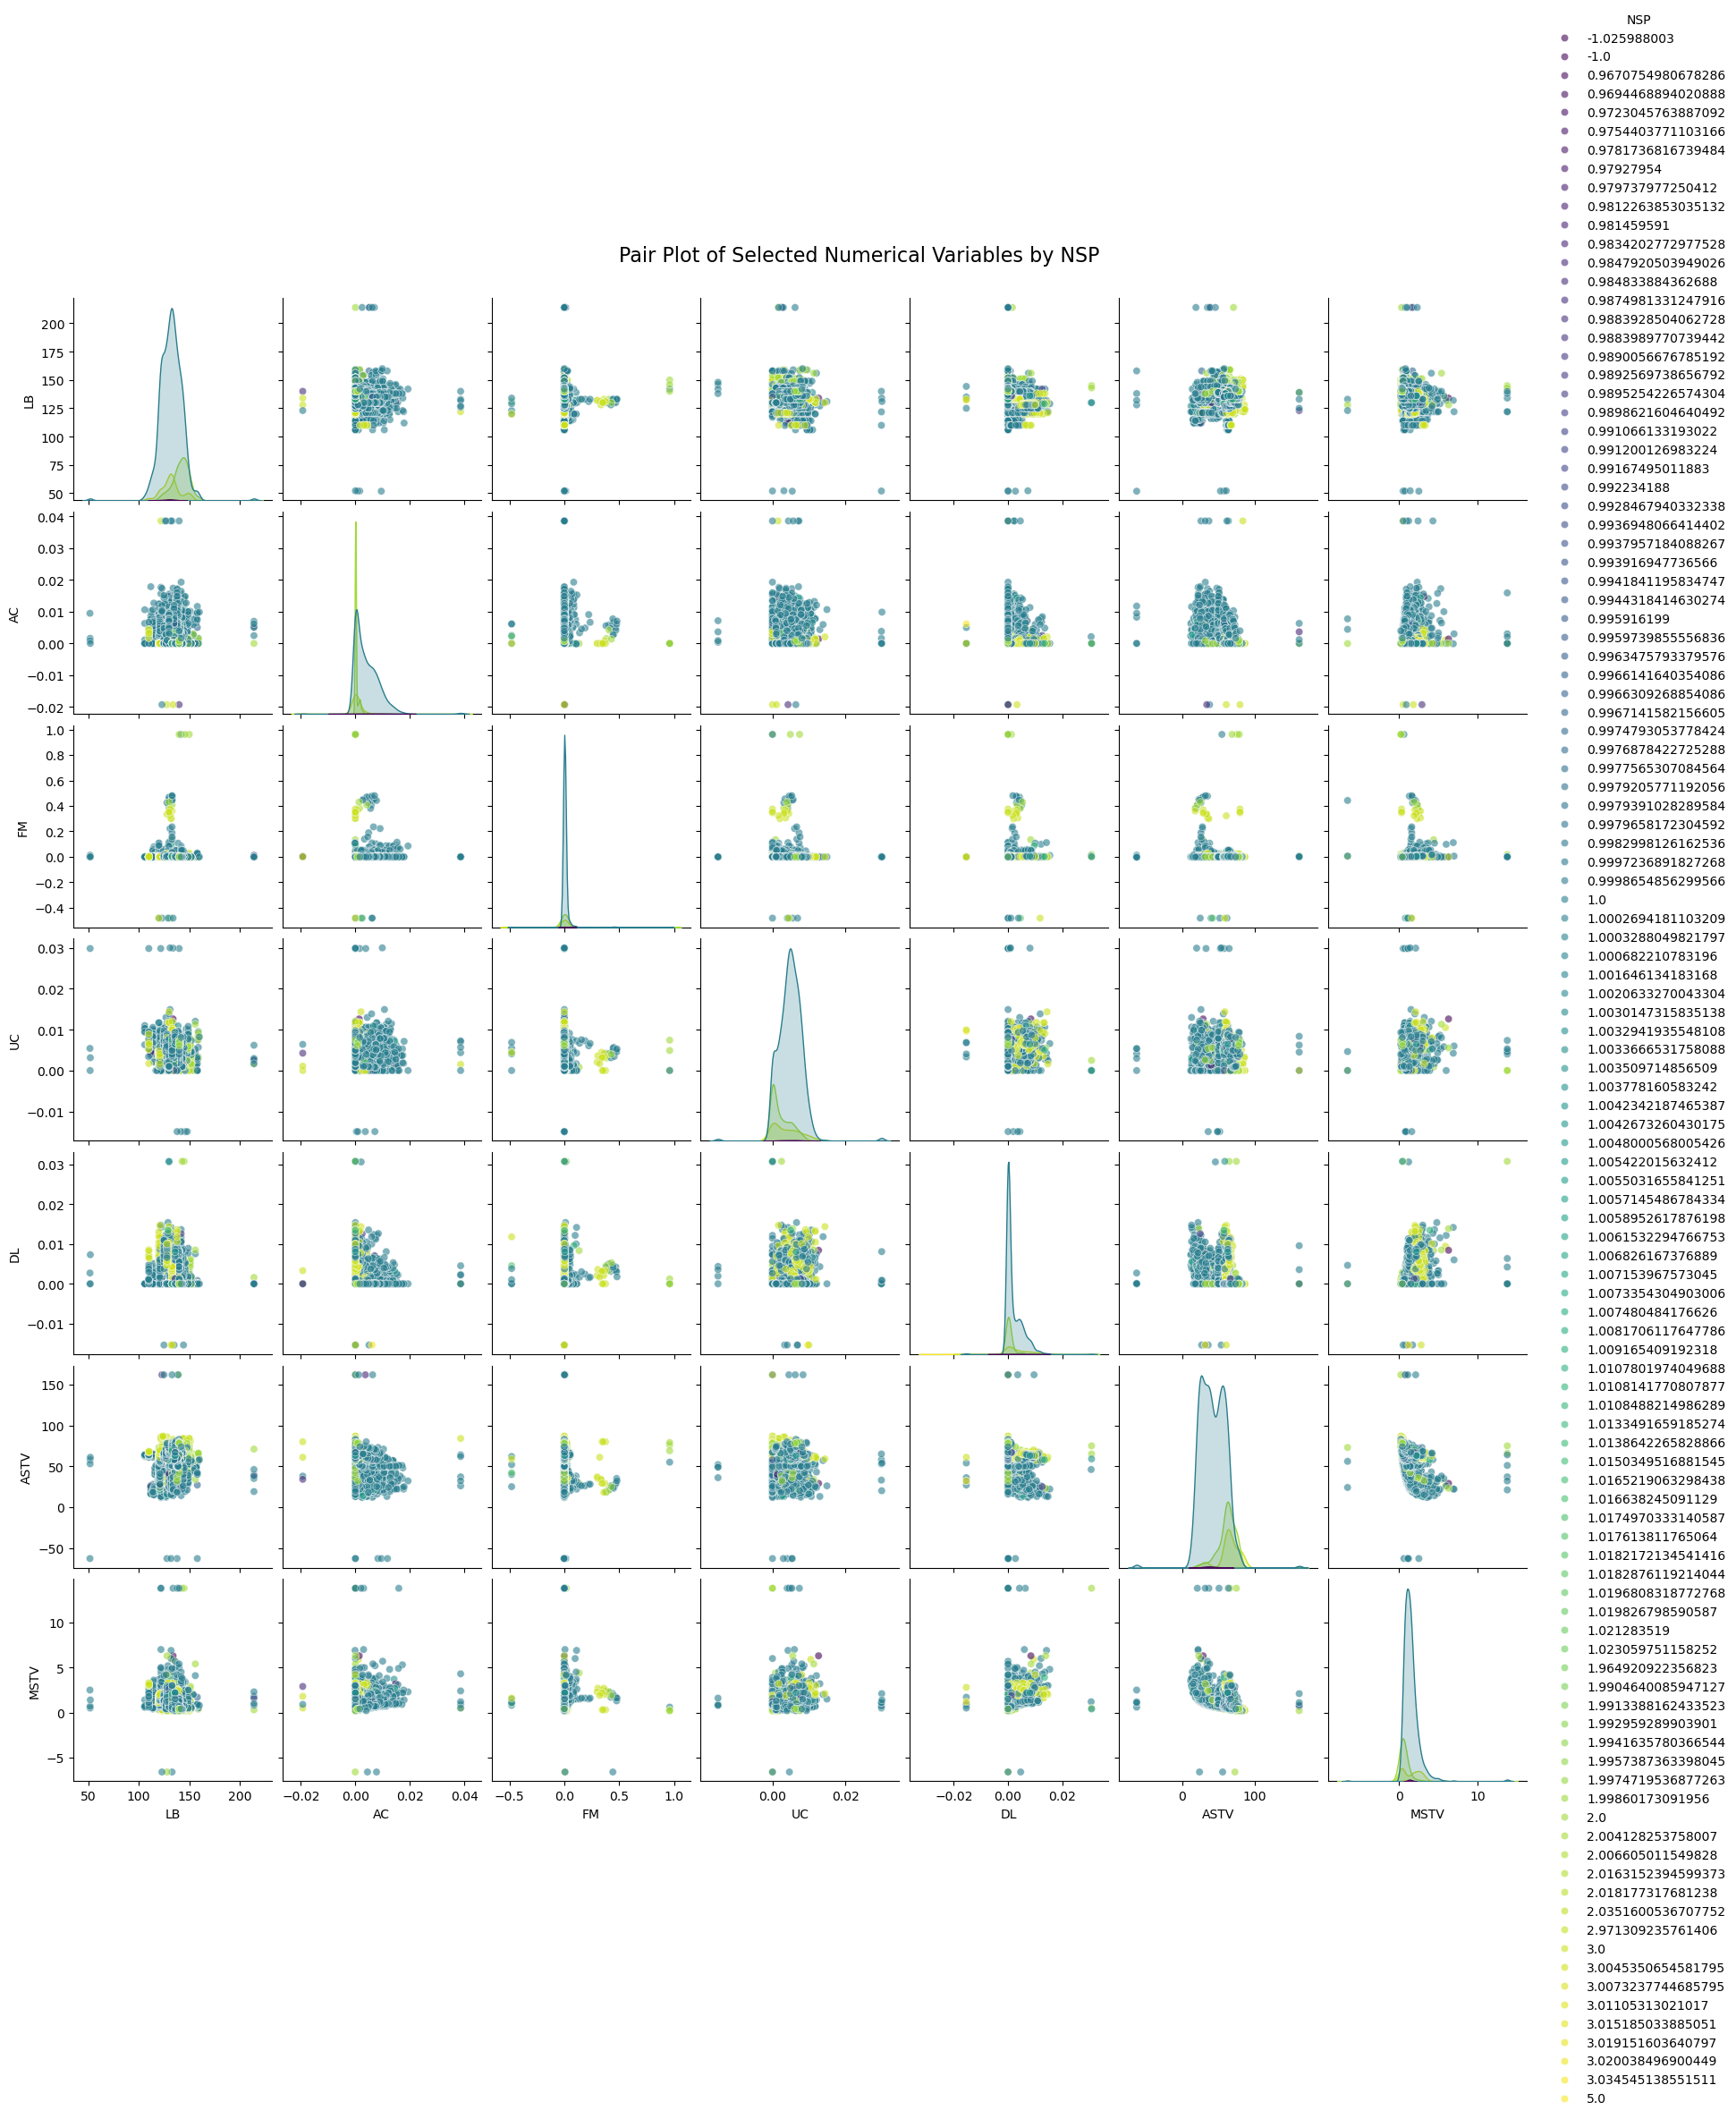

In [19]:
selected_numerical_cols = ['LB', 'AC', 'FM', 'UC', 'DL', 'ASTV', 'MSTV']


sns.pairplot(df, vars=selected_numerical_cols, hue='NSP', diag_kind='kde', plot_kws={'alpha': 0.6}, palette='viridis', height=2.5)
plt.suptitle('Pair Plot of Selected Numerical Variables by NSP', y=1.02, fontsize=16)
plt.show()

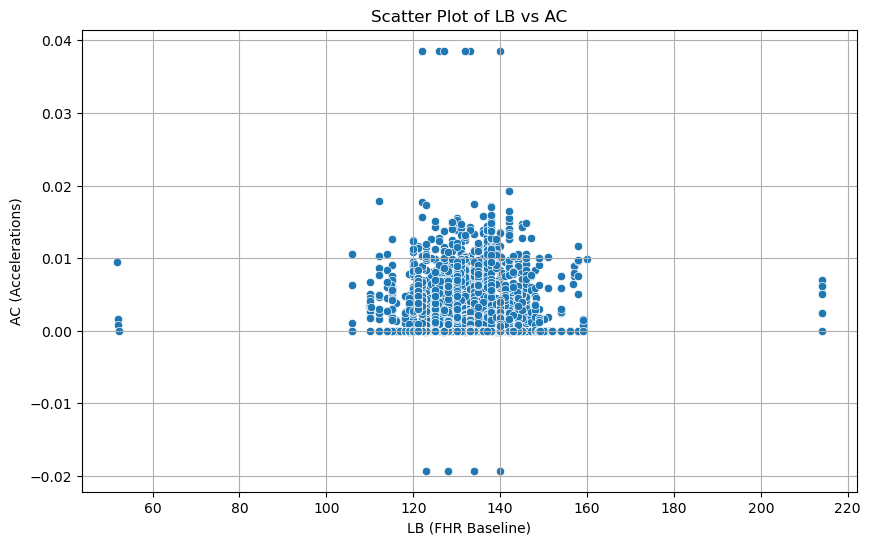

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='LB', y='AC', data=df)
plt.title('Scatter Plot of LB vs AC')
plt.xlabel('LB (FHR Baseline)')
plt.ylabel('AC (Accelerations)')
plt.grid(True)
plt.show()

**Summary of EDA Key Findings**

Numerical Variable Distributions (Histograms and Boxplots)
LB (FHR Baseline): The distribution appears roughly normal, centered around 130 bpm, with some values extending to both lower and higher ends. Boxplot shows a relatively tight spread with a few potential outliers on the lower side.
AC (Accelerations): Highly skewed towards zero, indicating that a significant number of observations have no accelerations. This suggests it might be count data or needs transformation.
FM (Fetal Movement): Also heavily skewed towards zero, implying that most records show very little or no fetal movement. This is consistent with AC and suggests many cases with minimal activity.
UC (Uterine Contractions): Similar to AC and FM, a large concentration at lower values, indicating few uterine contractions for many observations.
DL (Decelerations): Shows a similar pattern to AC, FM, and UC, with most observations having zero decelerations.
DS (Severe Decelerations): Extremely skewed towards zero, with almost all values being zero. This variable likely represents rare events.
DP (Prolonged Decelerations): Similar to DS, mostly zeros, indicating very few prolonged decelerations.
ASTV (Percentage of time with abnormal short term variability): The distribution is spread across a range, with a peak around 40-50%, but also has a significant number of zeros and values close to 100%. The boxplot indicates a wide spread.
MSTV (Mean value of short term variability): Appears right-skewed, with most values clustered at the lower end. Boxplot shows a concentration at low values and several outliers at higher values.
ALTV (Percentage of time with abnormal long term variability): Highly skewed towards zero, with many observations having no abnormal long-term variability. Similar to AC, FM, UC, DL, DS, DP.
MLTV (Mean value of long term variability): The distribution is right-skewed, with a concentration at lower values and a tail extending to higher values. Boxplot shows potential outliers.
Width (Histogram width): Appears somewhat normally distributed but with a slight left skew, centered around 70-80. Boxplot shows a relatively symmetric spread.
General Observations for Numerical Variables:

Several variables (AC, FM, UC, DL, DS, DP, ALTV) exhibit strong right-skewness and a large number of zero values, suggesting they might represent event counts and could benefit from transformations or specialized models for highly skewed data.
Outliers are present in most numerical variables, particularly visible in the boxplots. These outliers should be further investigated for data quality issues or genuine extreme observations.


**Data Analysis Key Findings**

Categorical Variable Identification and Conversion: 'NSP' and 'Tendency' were identified as potentially categorical variables, each containing 111 unique values, and were successfully converted to the 'category' data type.
Numerical Variable Distributions:
Many numerical variables, including 'AC' (Accelerations), 'FM' (Fetal Movement), 'UC' (Uterine Contractions), 'DL' (Decelerations), 'DS' (Severe Decelerations), 'DP' (Prolonged Decelerations), and 'ALTV' (Percentage of time with abnormal long term variability), are highly right-skewed with a significant number of zero values. This suggests they represent event counts.
'LB' (FHR Baseline) appears roughly normally distributed, centered around 130 bpm.
'MSTV' (Mean value of short term variability) and 'MLTV' (Mean value of long term variability) are right-skewed.
Outliers are prevalent across most numerical variables, as observed in the boxplots.
Categorical Variable Frequencies: Both 'NSP' (Fetal State Class Code) and 'Tendency' (Histogram Tendency) exhibit highly imbalanced distributions, with one category dominating significantly.
Correlation Heatmap: The heatmap revealed varying degrees of linear relationships among numerical features. For instance, 'ASTV' and 'MSTV' showed strong positive correlations, while 'AC', 'UC', and 'DL' also displayed positive correlations among themselves. 'LB' showed moderate correlations with 'ASTV', 'MSTV', and 'Width'.
Pair Plot Insights: Pair plots for selected numerical variables ('LB', 'AC', 'FM', 'UC', 'DL', 'ASTV', 'MSTV'), colored by 'NSP', demonstrated that different 'NSP' categories often form distinct clusters or exhibit separated distributions. This visually suggests that these numerical features are discriminative of the fetal state.


**Further Analyses or Next Steps**

Address the high skewness and prevalence of zero values in several numerical features (e.g., 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ALTV') through appropriate transformations or specialized models designed for count data or highly skewed distributions during modeling.
Investigate the numerous outliers present in the numerical variables to determine if they represent data errors or genuine extreme physiological conditions, and decide on appropriate handling strategies such as capping, transformation, or using robust models.
Given the highly imbalanced nature of 'NSP' and 'Tendency', employ techniques like oversampling, undersampling, or utilize evaluation metrics suitable for imbalanced datasets (e.g., precision, recall, F1-score, ROC AUC) during any predictive modeling tasks.